In [1]:
pip install nltk pandas matplotlib wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 960.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 960.0 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 573.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 726.2 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/300.2 kB 857.5 kB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.2 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 976.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  623495513     True      golden                  10               NaN   
1  623495514     True      golden                  12               NaN   
2  623495515     True      golden                  10               NaN   
3  623495516     True      golden                  17               NaN   
4  623495517    False   finalized                   3    12/12/14 12:14   

  sentiment  sentiment:confidence                            date  \
0         3                0.6264  Mon Dec 01 19:30:03 +0000 2014   
1         3                0.8129  Mon Dec 01 19:43:51 +0000 2014   
2         3                1.0000  Mon Dec 01 19:50:28 +0000 2014   
3         3                0.5848  Mon Dec 01 20:26:34 +0000 2014   
4         3                0.6474  Mon Dec 01 20:29:33 +0000 2014   

             id            query   sentiment_gold  \
0  5.400000e+17  #AAPL OR @Apple  3\nnot_relevant   
1  5.400000e+17  #AAPL OR @A

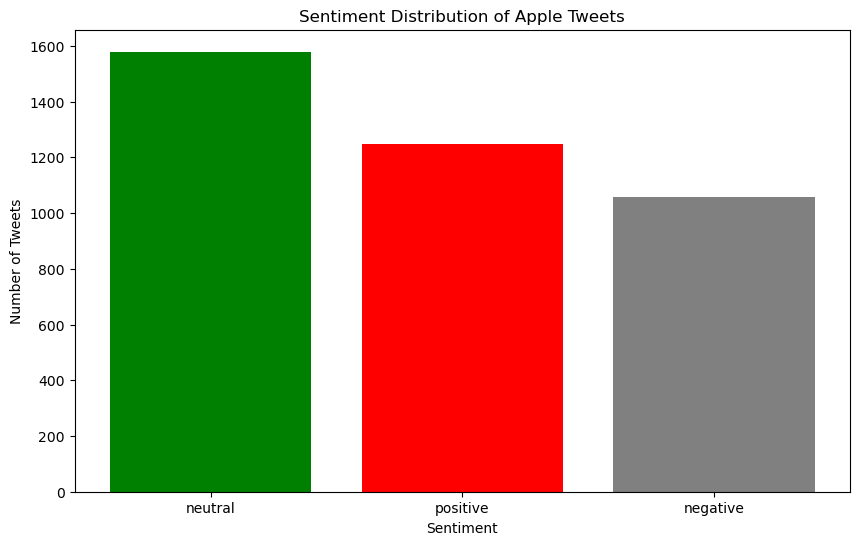

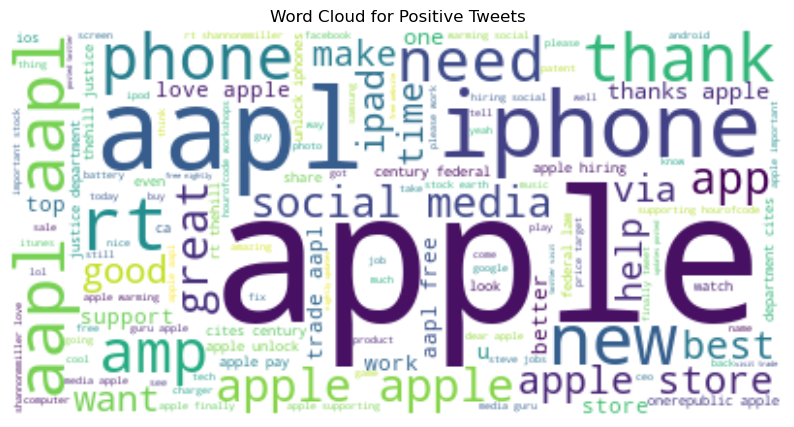

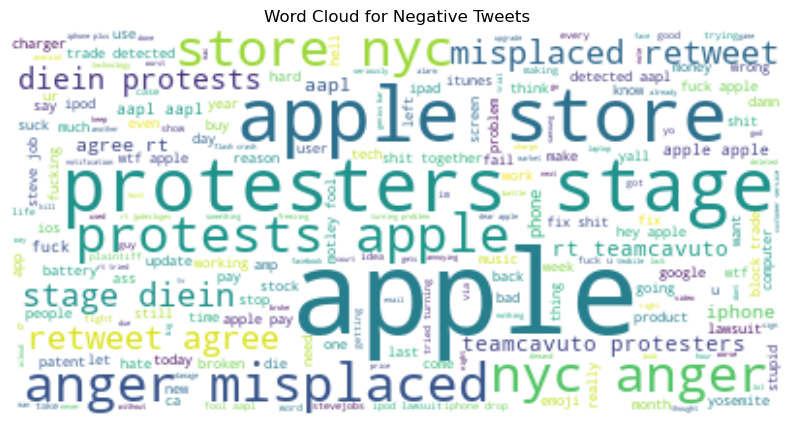

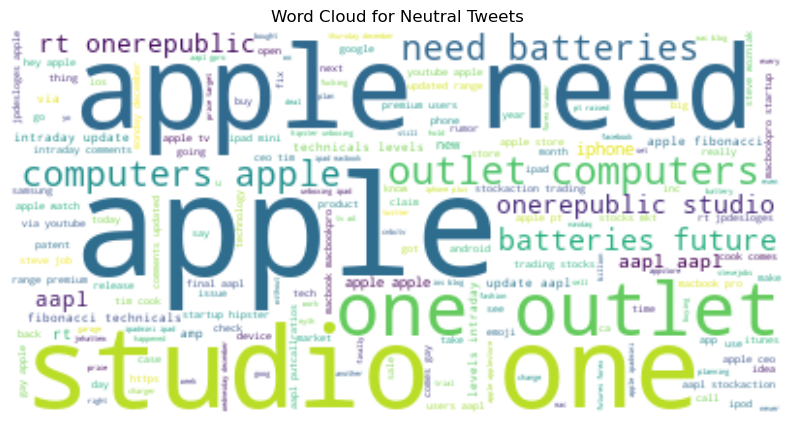

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

file_path = 'Apple-Twitter-Sentiment-DFE.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

print(data.head())
print(data.columns)

data = data[['text', 'sentiment', 'sentiment:confidence']]

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

data['clean_text'] = data['text'].apply(preprocess_text)

sid = SentimentIntensityAnalyzer()
data['vader_sentiment'] = data['clean_text'].apply(lambda x: sid.polarity_scores(x))

def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['vader_sentiment_category'] = data['vader_sentiment'].apply(lambda x: categorize_sentiment(x['compound']))

sentiment_counts = data['vader_sentiment_category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Apple Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

def plot_wordcloud(sentiment):
    text = ' '.join(data[data['vader_sentiment_category'] == sentiment]['clean_text'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=200).generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Tweets')
    plt.show()

plot_wordcloud('positive')
plot_wordcloud('negative')
plot_wordcloud('neutral')
